# 경사하강법 (Gradient Descent)

(본 실습 파일은 'PyTorch를 활용한 딥러닝 실습(이경록, 2024)'에 기반하여 작성되었습니다. Thanks to Teddylee!)

--

경사하강법 기본 개념 ==> 함수의 기울기(경사)를 구하여 기울기가 낮은 쪽으로 계속 이동시켜서 더이상 값이 변하지 않을 때까지 반복하는 것!

**비용 함수 (Cost Function 혹은 Loss Function)를 최소화**하기 위해 반복해서 파라미터를 업데이트 해 나가는 방식

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 출력 표기 생략
warnings.filterwarnings('ignore')

In [ ]:
# Batch Gradient Descent vs Stochastic Gradient Descent**
Image(url='https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png')

In [ ]:
Image(url='https://miro.medium.com/v2/resize:fit:640/format:webp/1*9A0u4eeU_75bPgEuEwnwVQ.png')

## 샘플에 활용할 데이터 셋 만들기

In [ ]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=15)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

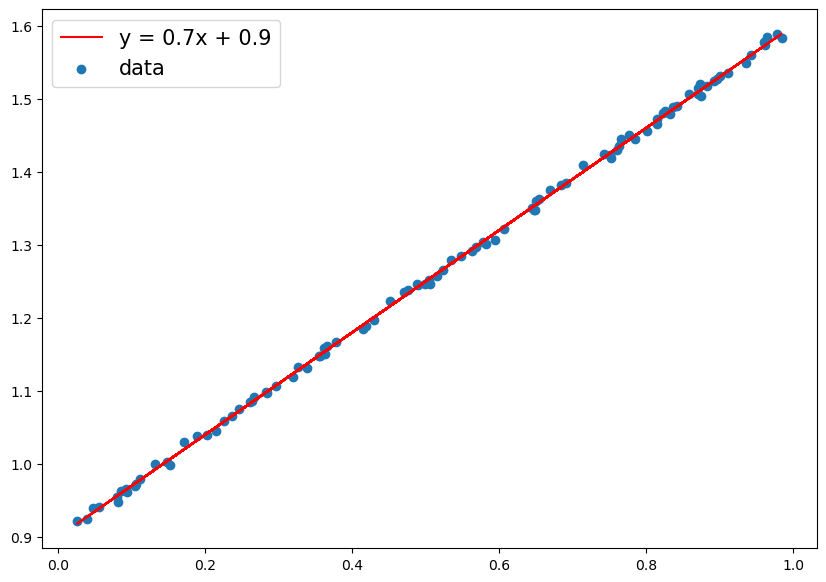

w: 0.7, b: 0.9


In [ ]:
x, y = make_linear(w=0.7, b=0.9, size=100, noise=0.01)

In [ ]:
x

array([0.3071059 , 0.24532271, 0.68668611, 0.36332965, 0.20353029,
       0.75998114, 0.82891404, 0.69022305, 0.48123351, 0.29413162,
       0.19955625, 0.77353358, 0.82836301, 0.01932347, 0.41717689,
       0.61181495, 0.87027954, 0.85533561, 0.03879901, 0.16697335,
       0.1300038 , 0.26301944, 0.86366084, 0.78549363, 0.57251946,
       0.43250554, 0.21457737, 0.37191059, 0.38626032, 0.49399527,
       0.77456051, 0.45767491, 0.50223951, 0.7429917 , 0.13969352,
       0.9962049 , 0.05945191, 0.27484429, 0.73627186, 0.90449056,
       0.2498121 , 0.20084465, 0.05254114, 0.26498155, 0.62908205,
       0.74564289, 0.1420469 , 0.32313592, 0.84336746, 0.58945668,
       0.39608611, 0.84171053, 0.73999895, 0.17351145, 0.35563446,
       0.54391569, 0.04506211, 0.31384938, 0.33629525, 0.27838295,
       0.80835113, 0.12404848, 0.77225703, 0.36119741, 0.80168615,
       0.21847401, 0.6206804 , 0.592778  , 0.26653867, 0.58740517,
       0.28053104, 0.5145995 , 0.82940982, 0.96977339, 0.84611

In [ ]:
y

array([1.34388287, 1.32564402, 1.1683165 , 0.89413419, 1.00892073,
       1.54039901, 1.10889805, 1.00610572, 1.25266728, 1.03740403,
       1.30440032, 1.57307393, 1.44852645, 1.28599781, 1.10216828,
       1.53823283, 1.3494719 , 1.20001207, 1.2414981 , 1.21860031,
       1.59603029, 1.51502013, 0.96218555, 1.51437076, 1.01646293,
       1.19734606, 1.32570113, 1.27754859, 1.26255331, 1.37355474,
       1.0755134 , 0.95922939, 1.43547255, 1.07545584, 1.40878358,
       1.02287059, 1.37041575, 1.01697871, 1.12472484, 1.35380817,
       1.02082307, 1.37878137, 1.40357946, 1.14381756, 1.07873932,
       1.0069339 , 1.45629782, 1.1171704 , 1.21236561, 0.93815099,
       1.1124924 , 1.52454476, 1.21848353, 1.45403307, 1.10849941,
       1.41142907, 1.1898663 , 1.00261493, 1.1027048 , 0.9426643 ,
       1.49676683, 1.17354111, 1.50630917, 1.53791532, 1.17188533,
       1.11084803, 1.17281012, 1.07536467, 0.97695063, 1.45171622,
       1.0359478 , 1.41883491, 1.15656429, 1.09966245, 1.15457

## 초기값 (Initializer)과 y_hat (예측, prediction) 함수 정의

w, b 값에 대하여 random한 초기 값을 설정

In [ ]:
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

In [ ]:
w, b

(0.8425017107331284, 0.26072163108029345)

`y_hat`은 `prediction`의 결과(값) --> 즉, 가설함수에서 실제 값(y)를 뺀 함수를 정의

In [ ]:
# 코드를 입력해 주세요
y_hat = w * x + b

## 오차(Error) 정의

Loss Function 혹은 Cost Function 정의

Loss (Cost) Function은 예측값인 `y_hat`과 `y`의 차이에 **제곱의 평균**으로 정의

제곱은 오차에 대한 음수 값을 허용하지 않으며, 이는 **Mean Squared Error(MSE)**인 평균 제곱 오차 평가 지표

In [ ]:
# 코드를 입력해 주세요
error = ((y_hat - y) ** 2).mean()

## 학습률 (Learning Rate)

In [ ]:
Image(url='https://www.deeplearningwizard.com/deep_learning/boosting_models_pytorch/images/lr1.png', width=700)

한 번 학습할 때 **얼마만큼 가중치(weight)를 업데이트** 해야 하는지 학습 양을 의미합니다.

너무 큰 학습률 (Learning Rate)은 가중치 갱신이 크게 되어 **자칫 Error가 수렴하지 못하고 발산**할 수 있으며,

너무 작은 학습률은 가중치 갱신이 작게 되어 **가중치 갱신이 충분히 되지 않고, 학습이 끝나** 버릴 수 있습니다. 즉 과소 적합되어 있는 상태로 남아 있을 수 있습니다.



## Gradient Descent 구현 (단항식)

In [ ]:
# 최대 반복 횟수
num_epoch = 500

# 학습율 (learning_rate)
learning_rate = 0.05

In [ ]:
errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
    # 코드를 입력해 주세요
    y_hat = w * x + b

    # 코드를 입력해 주세요
    error = ((y_hat - y) ** 2).mean()
    if error < 0.00005:
        break

    # 코드를 입력해 주세요
    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("Epoch {0:2} w = {1:.5f}, b = {2:.5f}, error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("Epoch {0:2} w = {1:.1f}, b = {2:.1f}, error = {3:.5f}".format(epoch, w, b, error))

Epoch  0 w = 0.60842, b = 0.61843, error = 0.12316
Epoch  5 w = 0.64614, b = 0.69065, error = 0.06404
Epoch 10 w = 0.67314, b = 0.74278, error = 0.03334
Epoch 15 w = 0.69243, b = 0.78044, error = 0.01739
Epoch 20 w = 0.70616, b = 0.80766, error = 0.00911
Epoch 25 w = 0.71589, b = 0.82738, error = 0.00481
Epoch 30 w = 0.72273, b = 0.84167, error = 0.00257
Epoch 35 w = 0.72750, b = 0.85206, error = 0.00141
Epoch 40 w = 0.73077, b = 0.85963, error = 0.00080
Epoch 45 w = 0.73297, b = 0.86517, error = 0.00049
Epoch 50 w = 0.73440, b = 0.86925, error = 0.00032
Epoch 55 w = 0.73528, b = 0.87226, error = 0.00024
Epoch 60 w = 0.73576, b = 0.87452, error = 0.00019
Epoch 65 w = 0.73595, b = 0.87623, error = 0.00016
Epoch 70 w = 0.73595, b = 0.87754, error = 0.00015
Epoch 75 w = 0.73580, b = 0.87856, error = 0.00014
Epoch 80 w = 0.73555, b = 0.87937, error = 0.00013
Epoch 85 w = 0.73522, b = 0.88003, error = 0.00013
Epoch 90 w = 0.73485, b = 0.88058, error = 0.00012
Epoch 95 w = 0.73445, b = 0.881

**시각화**

학습 진행(epoch)에 따른 오차를 시각화

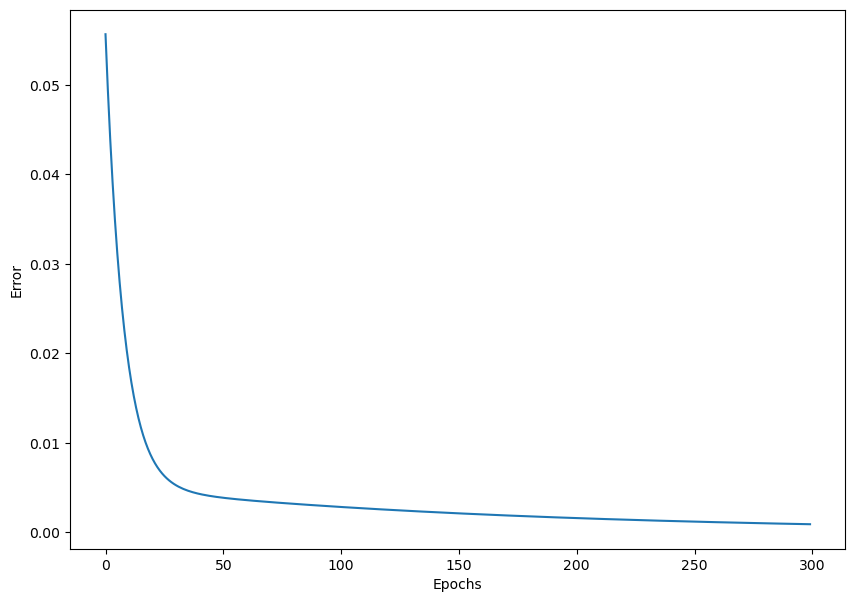

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()